## 11. Week 3: TO-DO

Задание основано на материале, изученном в данной лабораторной работе. Предполагаемое время выполнения: 1-2 часа.

### Часть 1: Реализация пользовательской стратегии кросс-валидации (20%)

1. Реализуйте свою стратегию кросс-валидации, которая будет учитывать специфику предложенного датасета.
2. Например, можно реализовать стратегию, которая разделяет данные на фолды с учетом значений определенного признака.
3. Сравните результаты вашей стратегии с стандартными методами (KFold, StratifiedKFold).
4. Визуализируйте различия между стандартной и вашей стратегией.


In [29]:
# Библиотеки для работы с данными
import numpy as np
import pandas as pd

# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Основные библиотеки scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

# Линейные модели
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.datasets import fetch_openml

# kNN модели
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

# Библиотека Yellowbrick для расширенной визуализации
from yellowbrick.model_selection import ValidationCurve, LearningCurve, CVScores
from yellowbrick.regressor import ResidualsPlot, PredictionError
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC
from yellowbrick.features import FeatureImportances, PCA

# Настройка отображения
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set(font_scale=1.1)

# Отключаем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Загрузка датасета load_diabetes
from sklearn.datasets import load_diabetes

# housing = fetch_california_housing(as_frame=True)
# X = housing.data
# y = housing.target

df = load_diabetes(as_frame=True)

X = df.data
Y = df.target

print(f"Размеры датасета: {X.shape}")
print(f"Количество признаков: {X.shape[1]}")
print(f"Названия признаков: {', '.join(X.columns)}")

# примечания по признакам:
# bmi - имт;
# bp - blood_pressure
# s1 - total_cholesterol общий холестерин
# s2 - ldl_cholesterol липопротеины низкой плотности
# s3 - hdl_cholesterol липопротеины высокой плотности
# s4 - cholesterol_ratio общие липиды / холестерин
# s5 - blood_glucose уровень глюкозы в крови
# s6 - hbA1c уровень гликированного гемоглобина

# количественная оценка прогрессирования диабета через год после базового измерения
print(f"Целевая переменная: Прогрессирование диабета (это величина, которую модель пытается предсказать или объяснить на основе других данных)")

Размеры датасета: (442, 10)
Количество признаков: 10
Названия признаков: age, sex, bmi, bp, s1, s2, s3, s4, s5, s6
Целевая переменная: Прогрессирование диабета (это величина, которую модель пытается предсказать или объяснить на основе других данных)


In [31]:
# Изучим статистические характеристики датасета
print("Статистические характеристики признаков:")
display(X.describe())

print("\nСтатистические характеристики целевой переменной:")
display(pd.DataFrame(Y).describe())

Статистические характеристики признаков:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01



Статистические характеристики целевой переменной:


,target
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


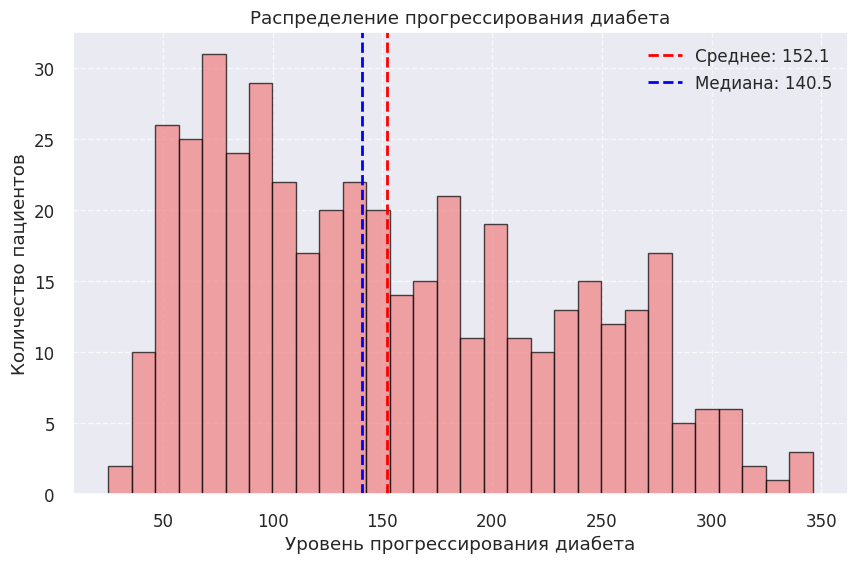

Медианное прогрессирование диабета: 140.5
Количество пациентов в классе 0 (низкое прогрессирование): 221
Количество пациентов в классе 1 (высокое прогрессирование): 221
Баланс классов: 50.0% - высокое прогрессирование


In [32]:
# Визуализируем распределение целевой переменной (прогрессирование диабета)
plt.figure(figsize=(10, 6))
plt.hist(Y, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Распределение прогрессирования диабета')
plt.xlabel('Уровень прогрессирования диабета')
plt.ylabel('Количество пациентов')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(Y.mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {Y.mean():.1f}')
plt.axvline(np.median(Y), color='blue', linestyle='--', linewidth=2, label=f'Медиана: {np.median(Y):.1f}')
plt.legend()
plt.show()

# Создадим бинарную целевую переменную для задачи классификации
# Будем считать прогрессирование диабета "высоким", если оно выше медианного значения
median_progression = np.median(Y)
y_class = (Y > median_progression).astype(int)

print(f"Медианное прогрессирование диабета: {median_progression:.1f}")
print(f"Количество пациентов в классе 0 (низкое прогрессирование): {sum(y_class == 0)}")
print(f"Количество пациентов в классе 1 (высокое прогрессирование): {sum(y_class == 1)}")
print(f"Баланс классов: {sum(y_class == 1)/len(y_class)*100:.1f}% - высокое прогрессирование")

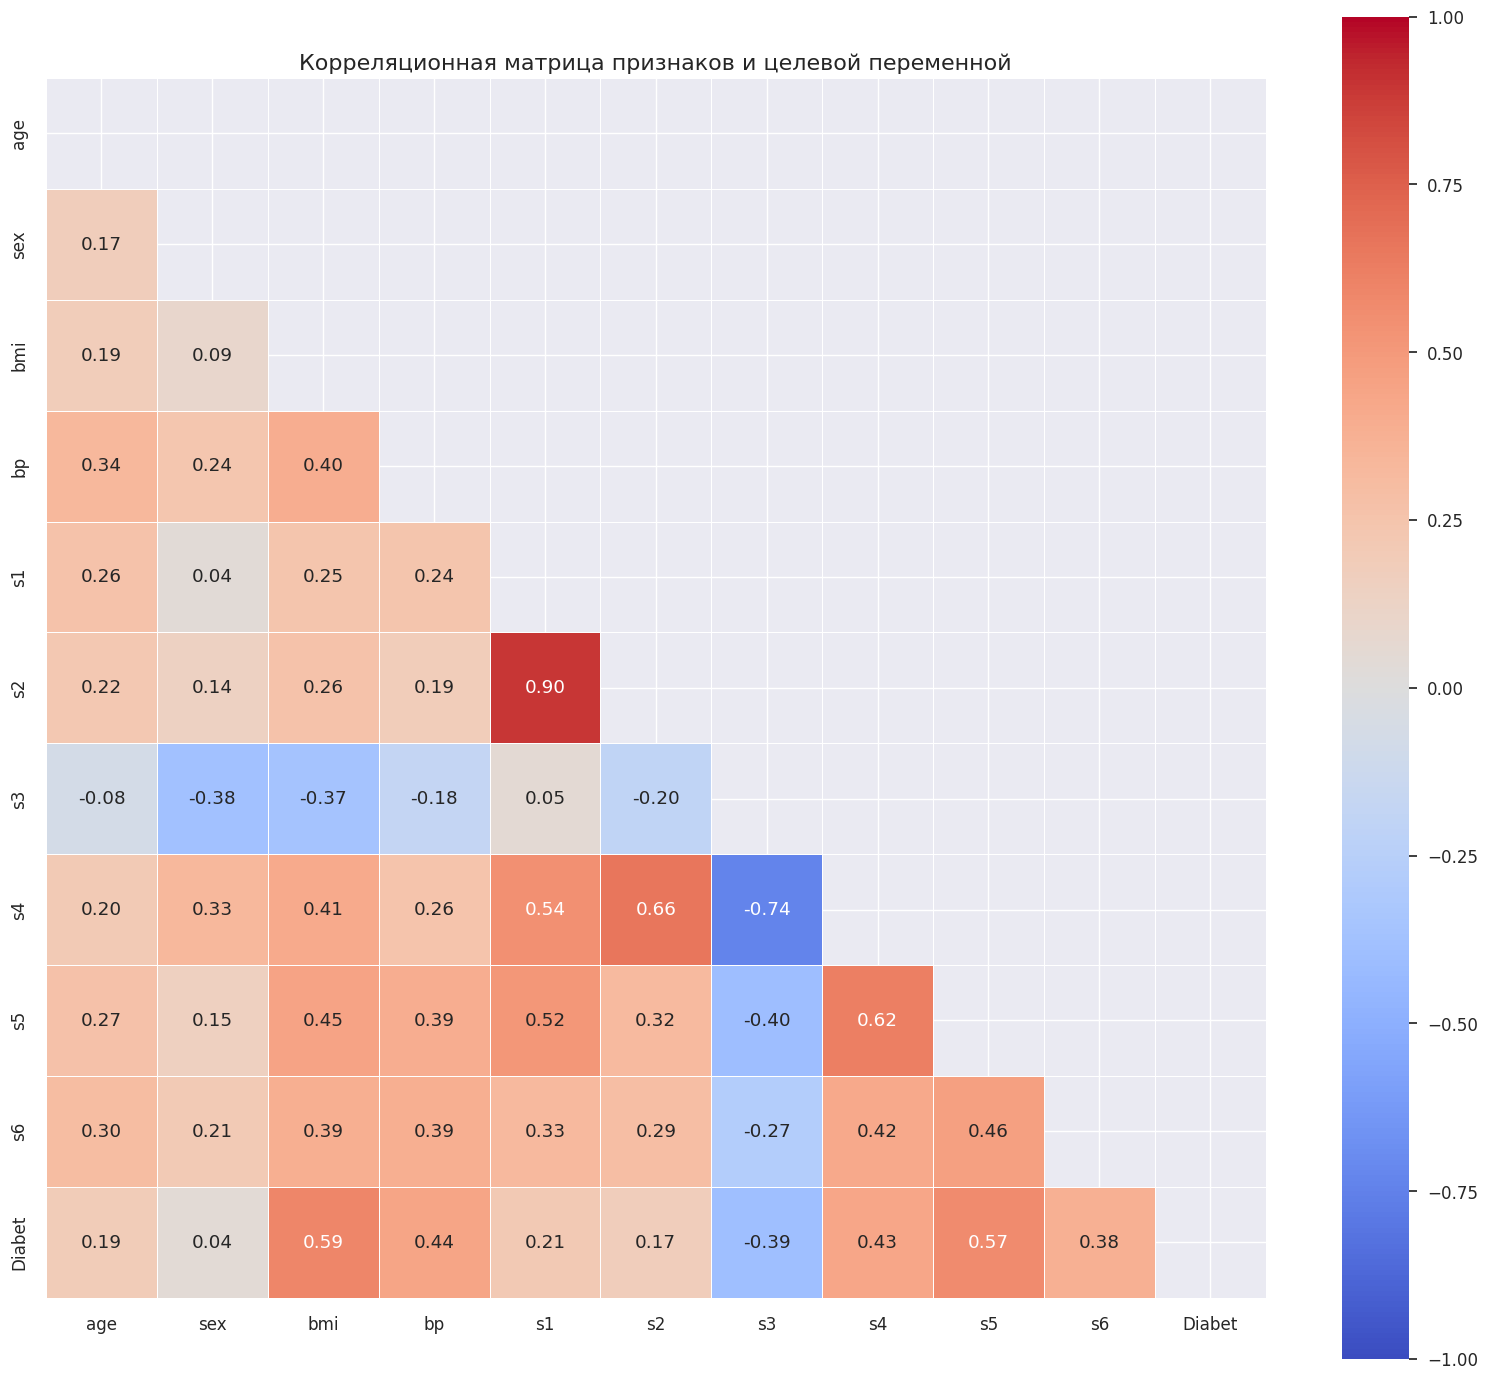

In [33]:
# Визуализируем корреляции между признаками
plt.figure(figsize=(16, 14))
correlation_matrix = pd.concat([X, pd.Series(Y, name='Diabet')], axis=1).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
plt.title('Корреляционная матрица признаков и целевой переменной', fontsize=16)
plt.tight_layout()
plt.show()

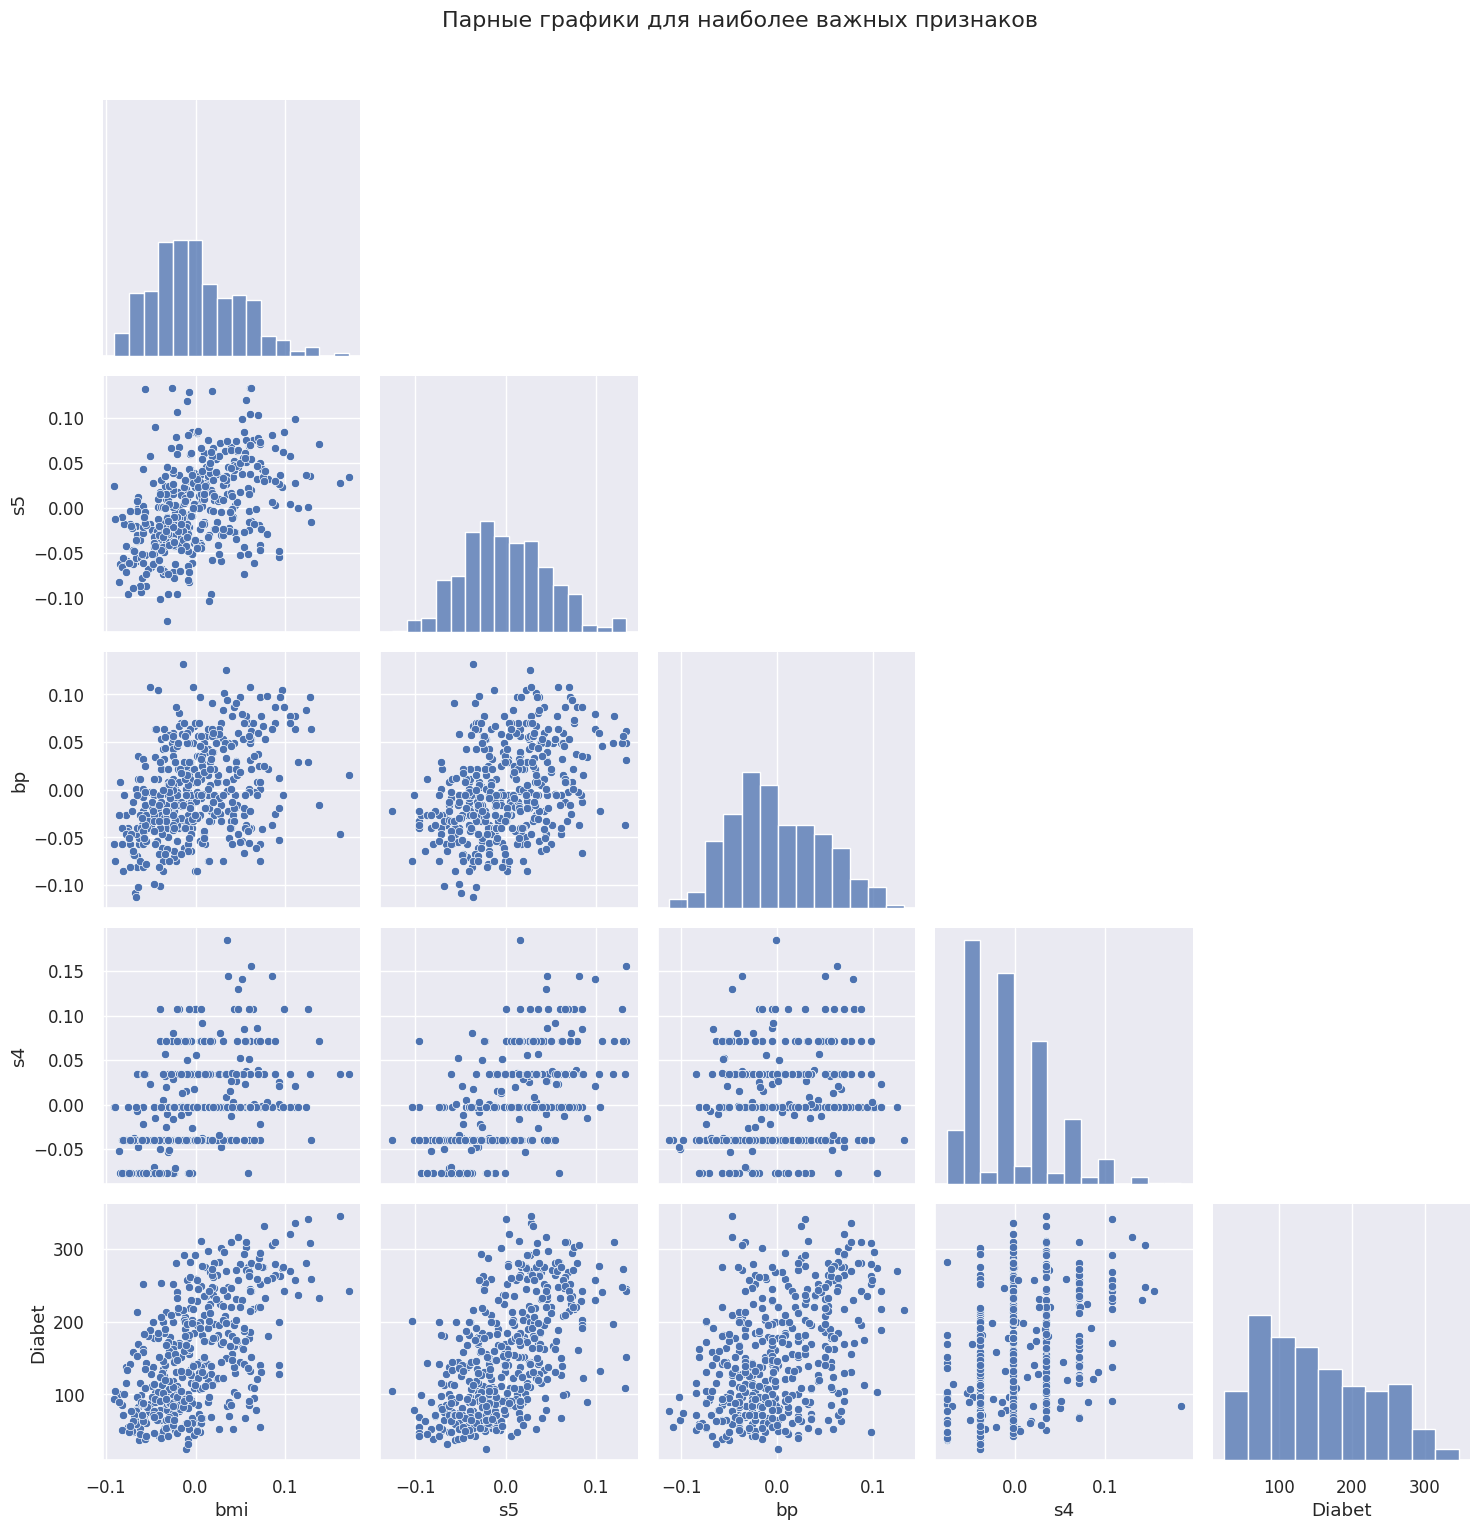

In [34]:
# Создадим парные графики для наиболее коррелированных признаков с целевой переменной
most_correlated = correlation_matrix['Diabet'].abs().sort_values(ascending=False)[1:5].index.tolist()
data_for_pairplot = pd.concat([X[most_correlated], pd.Series(Y, name='Diabet')], axis=1)
sns.pairplot(data_for_pairplot, height=3.0, corner=True)
plt.suptitle('Парные графики для наиболее важных признаков', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [35]:
# Разделим данные на обучающую и тестовую выборки
# Для регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Для классификации
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

print("Данные для регрессии:")
print(f"Обучающая выборка: {X_train_reg.shape}, {y_train_reg.shape}")
print(f"Тестовая выборка: {X_test_reg.shape}, {y_test_reg.shape}")
print("\nДанные для классификации:")
print(f"Обучающая выборка: {X_train_cls.shape}, {y_train_cls.shape}")
print(f"Тестовая выборка: {X_test_cls.shape}, {y_test_cls.shape}")

Данные для регрессии:
Обучающая выборка: (353, 10), (353,)
Тестовая выборка: (89, 10), (89,)

Данные для классификации:
Обучающая выборка: (353, 10), (353,)
Тестовая выборка: (89, 10), (89,)


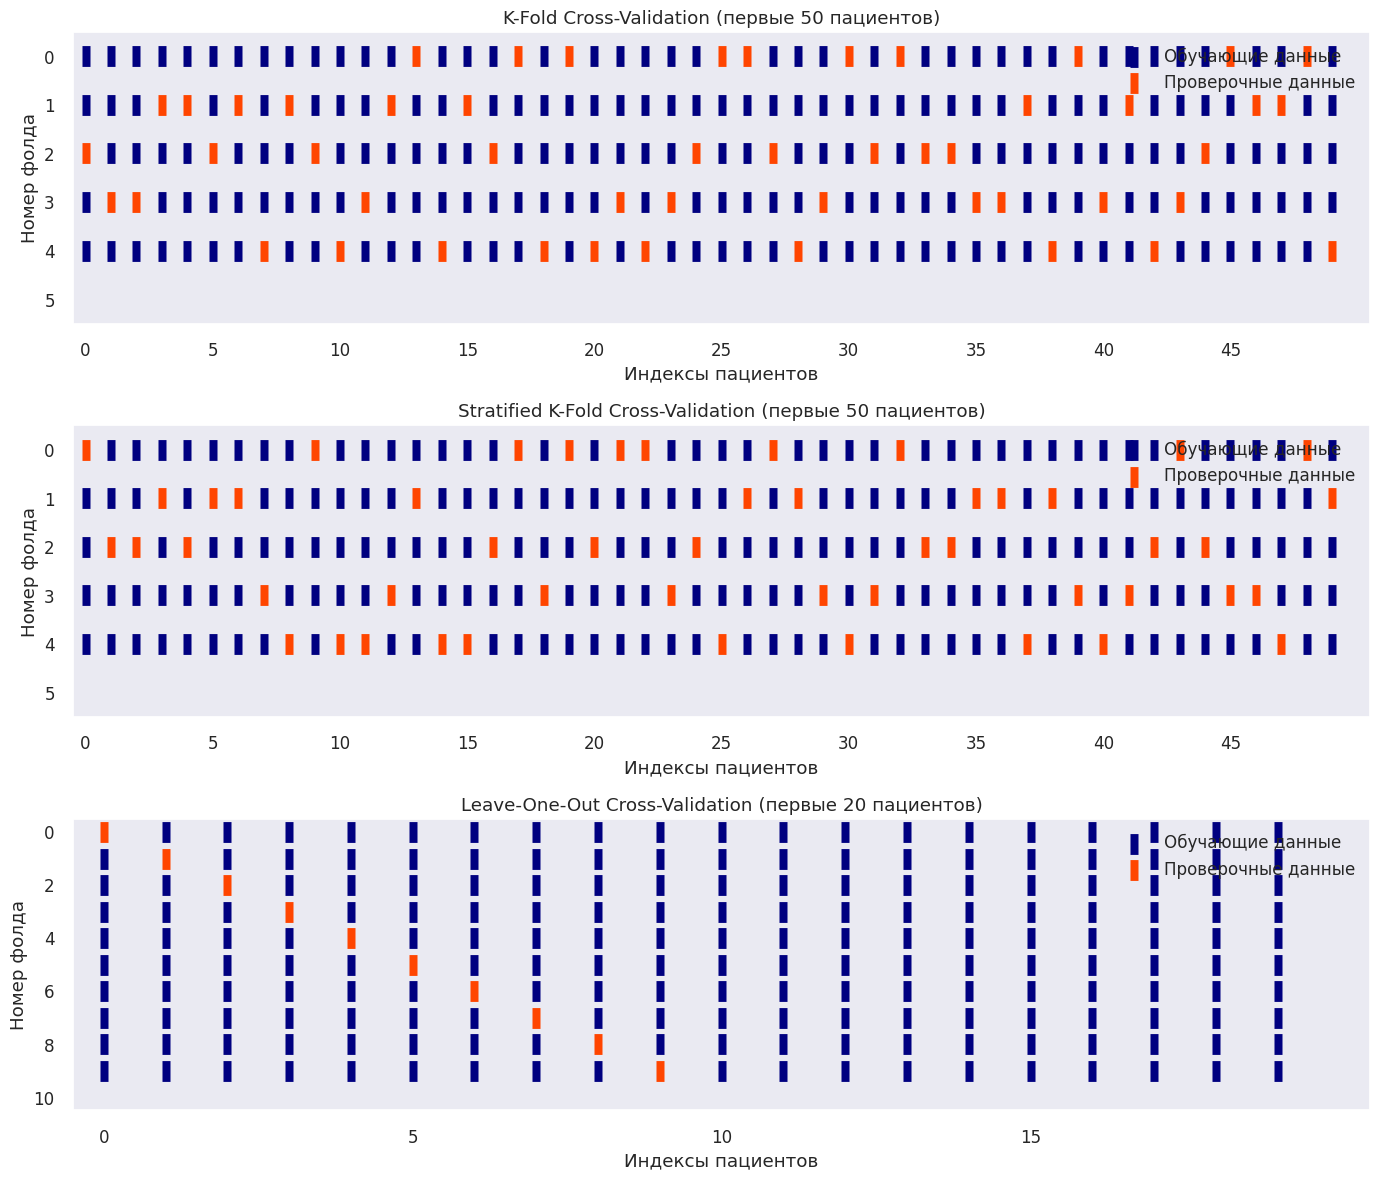

In [36]:
# Визуализация K-Fold Cross-Validation
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Создает визуализацию разбиения на фолды в кросс-валидации"""
    # Ограничиваем количество образцов для наглядности (первые 50 пациентов)
    n_samples = min(len(X), 50)
    X_vis = X.iloc[:n_samples] if hasattr(X, 'iloc') else X[:n_samples]
    y_vis = y[:n_samples]

    n_splits = min(n_splits, cv.get_n_splits(X_vis, y_vis))

    # Настраиваем цветовую схему
    cmap_cv = plt.cm.coolwarm

    # Устанавливаем размеры и стиль
    ax.set_ylim(n_splits + 0.5, -0.5)
    ax.set_xlim(-0.5, n_samples + 0.5)
    ax.set_xlabel('Индексы пациентов')
    ax.set_ylabel('Номер фолда')
    ax.set_title(f'{type(cv).__name__}')
    ax.grid(False)

    # Генерируем разбиения на фолды
    for i, (train_idx, test_idx) in enumerate(cv.split(X_vis, y_vis)):
        if i >= n_splits:  # Ограничиваем количество отображаемых фолдов
            break

        # Заполняем тренировочные индексы
        ax.scatter(train_idx, [i] * len(train_idx), c='navy',
                   marker='_', lw=lw, label='Обучающие данные' if i == 0 else "")
        # Заполняем тестовые индексы
        ax.scatter(test_idx, [i] * len(test_idx), c='orangered',
                   marker='_', lw=lw, label='Проверочные данные' if i == 0 else "")

    # Добавляем легенду
    ax.legend(loc='upper right')
    ax.set_xticks(range(0, n_samples, 5))  # Подписи каждые 5 пациентов

    return ax

# Создаем визуализацию различных видов кросс-валидации
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Используем бинарную целевую переменную для классификации
# (должна быть определена ранее: y_class = (y > np.median(y)).astype(int))

# 1. K-Fold CV (стандартный)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
plot_cv_indices(kf, X, y_class, axes[0], n_splits=5, lw=15)
axes[0].set_title('K-Fold Cross-Validation (первые 50 пациентов)')

# 2. Stratified K-Fold CV (стратифицированный)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_cv_indices(skf, X, y_class, axes[1], n_splits=5, lw=15)
axes[1].set_title('Stratified K-Fold Cross-Validation (первые 50 пациентов)')

# 3. Leave-One-Out CV (для меньшего количества данных)
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
# Берем только 20 пациентов для наглядности
X_sample_loo = X.iloc[:20] if hasattr(X, 'iloc') else X[:20]
y_sample_loo = y_class[:50]
plot_cv_indices(loo, X_sample_loo, y_sample_loo, axes[2], n_splits=10, lw=15)
axes[2].set_title('Leave-One-Out Cross-Validation (первые 20 пациентов)')

plt.tight_layout()
plt.show()


### Часть 2: Сравнение различных методов регуляризации (25%)

1. Выделите из обучающей выборки подмножество данных (например, только для определенного диапазона значений целевой переменной).
2. Примените различные методы регуляризации (Ridge, Lasso, ElasticNet) к этому подмножеству.
3. Исследуйте влияние параметров регуляризации на переобучение модели.
4. Проанализируйте, какие признаки "выживают" при использовании Lasso-регуляризации, и объясните почему.


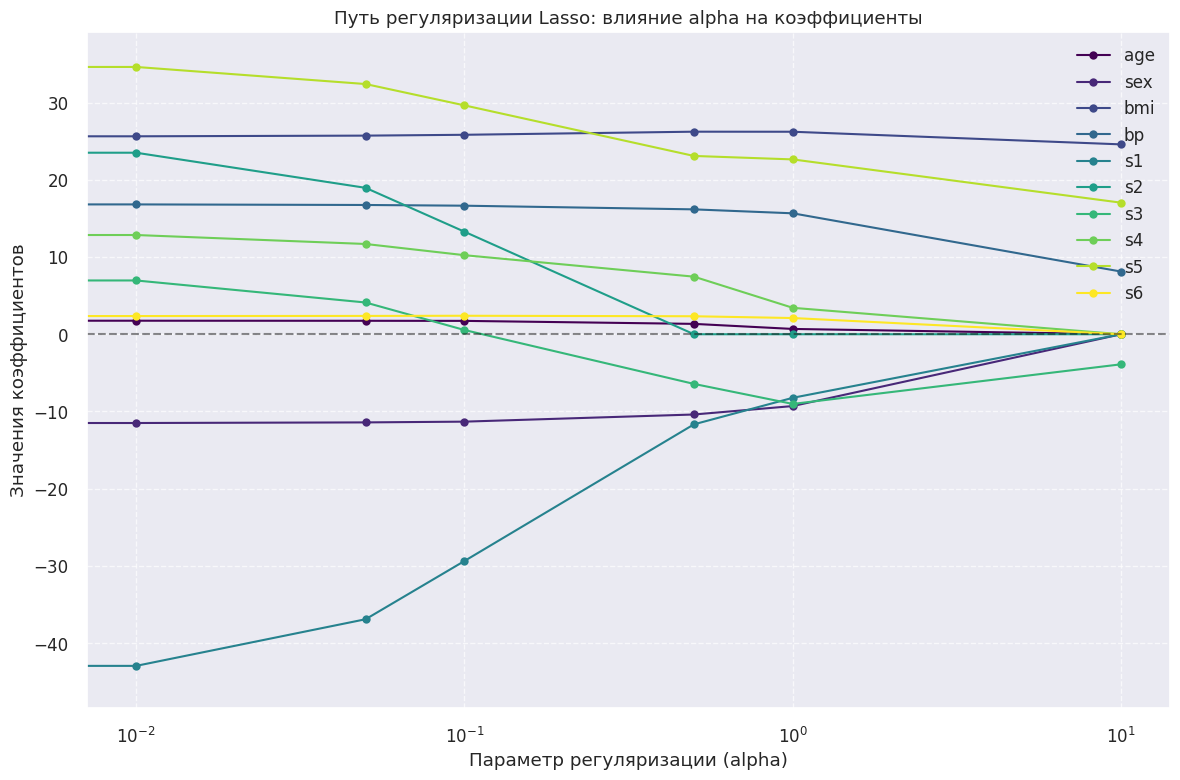

Влияние параметра alpha на разреженность модели Lasso:
Alpha = 0.00: 10 ненулевых коэффициентов из 10
Alpha = 0.01: 10 ненулевых коэффициентов из 10
Alpha = 0.05: 10 ненулевых коэффициентов из 10
Alpha = 0.10: 10 ненулевых коэффициентов из 10
Alpha = 0.50: 9 ненулевых коэффициентов из 10
Alpha = 1.00: 9 ненулевых коэффициентов из 10
Alpha = 10.00: 4 ненулевых коэффициентов из 10


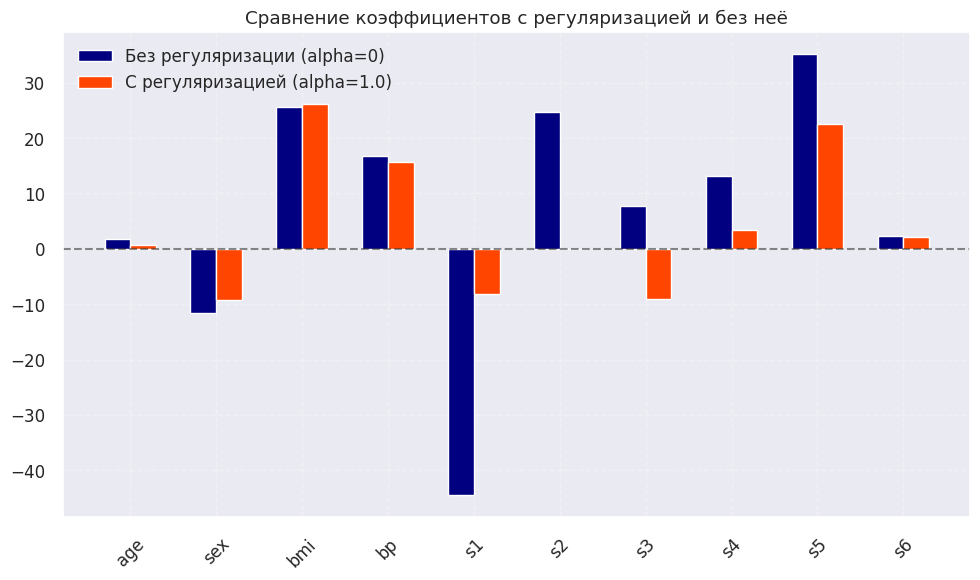

In [37]:
# Визуализация влияния L1 регуляризации на коэффициенты модели
from sklearn.preprocessing import StandardScaler

# Подготовим данные (стандартизация)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_reg)

# Обучим модели с разным уровнем регуляризации
alphas = [0, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0]
coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_scaled, y_train_reg)
    coefs.append(lasso.coef_)

# Построим график изменения коэффициентов
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, X.shape[1]))

for i, feature in enumerate(X.columns):
    plt.plot(alphas, [coef[i] for coef in coefs], '-o', color=colors[i], label=feature)

plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Параметр регуляризации (alpha)')
plt.ylabel('Значения коэффициентов')
plt.title('Путь регуляризации Lasso: влияние alpha на коэффициенты')
plt.xscale('log')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Вывод количества ненулевых коэффициентов для каждого alpha
print("Влияние параметра alpha на разреженность модели Lasso:")
for alpha, coef in zip(alphas, coefs):
    non_zero = np.sum(coef != 0)
    print(f"Alpha = {alpha:.2f}: {non_zero} ненулевых коэффициентов из {len(coef)}")

# Визуализируем, как L1 регуляризация устанавливает некоторые коэффициенты равными нулю
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefs[0])), coefs[0], width=0.3, label='Без регуляризации (alpha=0)', color='navy')
plt.bar(np.arange(len(coefs[-2])) + 0.3, coefs[-2], width=0.3, label=f'С регуляризацией (alpha={alphas[-2]})', color='orangered')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.xticks(np.arange(len(coefs[0])) + 0.15, X.columns, rotation=45)
plt.legend()
plt.title('Сравнение коэффициентов с регуляризацией и без неё')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

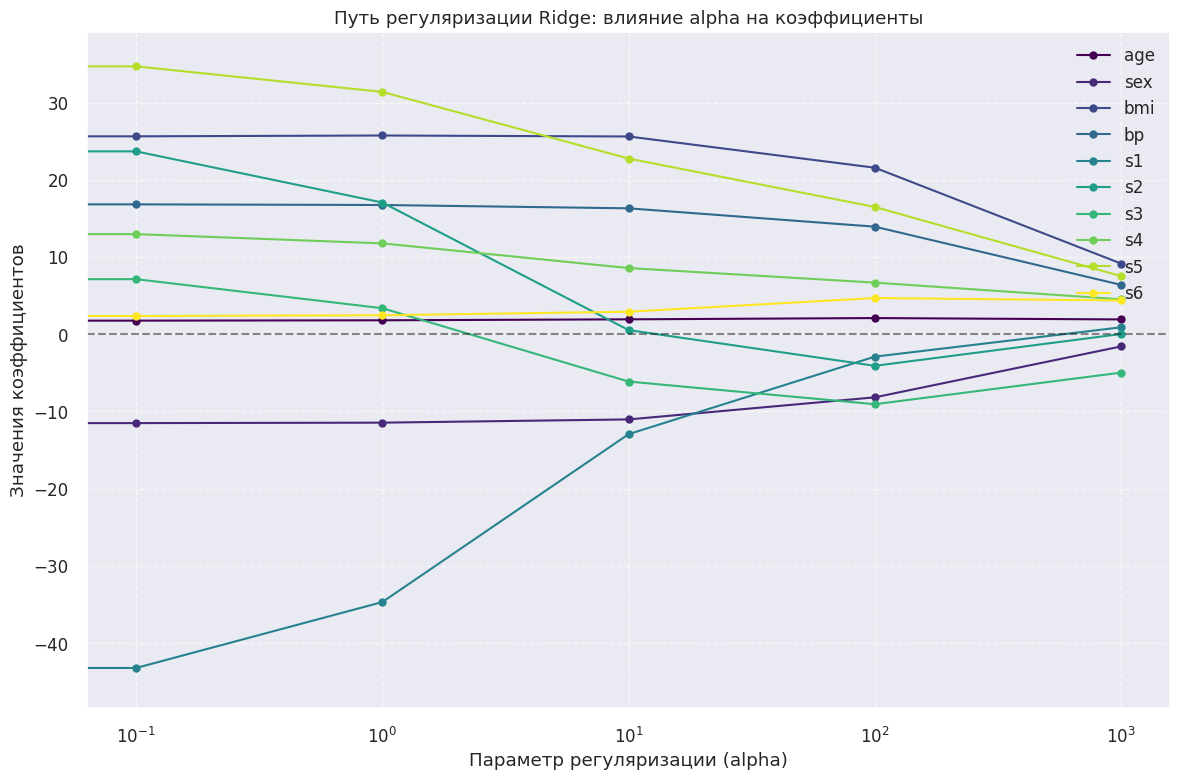

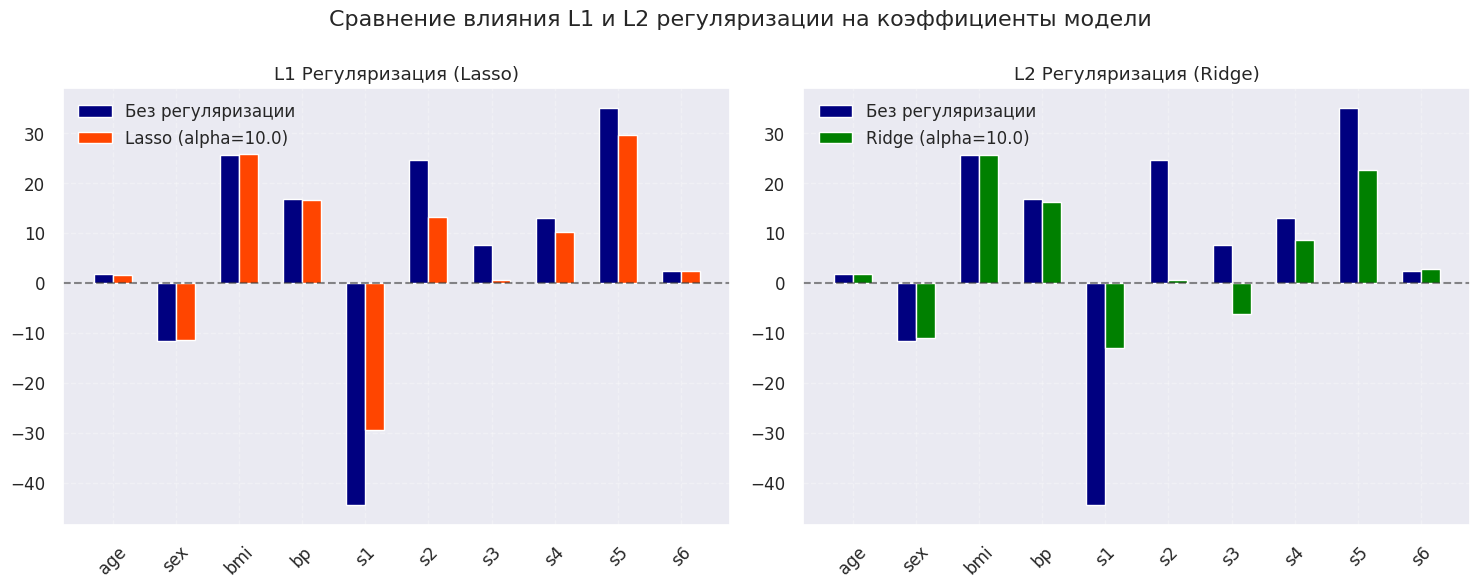

In [38]:
# Визуализация влияния L2 регуляризации на коэффициенты модели
alphas = [0, 0.1, 1.0, 10.0, 100.0, 1000.0]
coefs_ridge = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y_train_reg)
    coefs_ridge.append(ridge.coef_)

# Построим график изменения коэффициентов
plt.figure(figsize=(12, 8))

for i, feature in enumerate(X.columns):
    plt.plot(alphas, [coef[i] for coef in coefs_ridge], '-o', color=colors[i], label=feature)

plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Параметр регуляризации (alpha)')
plt.ylabel('Значения коэффициентов')
plt.title('Путь регуляризации Ridge: влияние alpha на коэффициенты')
plt.xscale('log')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Сравним влияние L1 и L2 регуляризации на коэффициенты
plt.figure(figsize=(15, 6))

# L1 (Lasso)
plt.subplot(1, 2, 1)
plt.bar(range(len(coefs[0])), coefs[0], width=0.3, label='Без регуляризации', color='navy')
plt.bar(np.arange(len(coefs[3])) + 0.3, coefs[3], width=0.3, label=f'Lasso (alpha={alphas[3]})', color='orangered')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.xticks(np.arange(len(coefs[0])) + 0.15, X.columns, rotation=45)
plt.title('L1 Регуляризация (Lasso)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

# L2 (Ridge)
plt.subplot(1, 2, 2)
plt.bar(range(len(coefs_ridge[0])), coefs_ridge[0], width=0.3, label='Без регуляризации', color='navy')
plt.bar(np.arange(len(coefs_ridge[3])) + 0.3, coefs_ridge[3], width=0.3, label=f'Ridge (alpha={alphas[3]})', color='green')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.xticks(np.arange(len(coefs_ridge[0])) + 0.15, X.columns, rotation=45)
plt.title('L2 Регуляризация (Ridge)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

plt.suptitle('Сравнение влияния L1 и L2 регуляризации на коэффициенты модели', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

In [39]:
# Визуализация Bias-Variance Tradeoff для регуляризованных моделей
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Создаем данные для визуализации эффекта регуляризации
np.random.seed(42)

# Функция для получения ошибок при разных значениях alpha
def get_errors(model_class, alphas, X_train, y_train, X_test, y_test, cv=5):
    train_errors = []
    test_errors = []
    cv_errors = []

    for alpha in alphas:
        # Создаем и обучаем модель
        model = model_class(alpha=alpha)
        model.fit(X_train, y_train)

        # Считаем ошибки
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        train_error = mean_squared_error(y_train, train_pred)
        test_error = mean_squared_error(y_test, test_pred)

        # Кросс-валидация
        cv_scores = cross_val_score(model_class(alpha=alpha), X_train, y_train,
                                    cv=cv, scoring='neg_mean_squared_error')
        cv_error = -np.mean(cv_scores)

        train_errors.append(train_error)
        test_errors.append(test_error)
        cv_errors.append(cv_error)

    return train_errors, test_errors, cv_errors

# Подготовим диапазон значений alpha
alphas = np.logspace(-3, 3, 50)

# Получим ошибки для Ridge регрессии
ridge_train_errors, ridge_test_errors, ridge_cv_errors = get_errors(
    Ridge, alphas, X_scaled, y_train_reg, scaler.transform(X_test_reg), y_test_reg
)

# Получим ошибки для Lasso регрессии
lasso_train_errors, lasso_test_errors, lasso_cv_errors = get_errors(
    Lasso, alphas, X_scaled, y_train_reg, scaler.transform(X_test_reg), y_test_reg
)

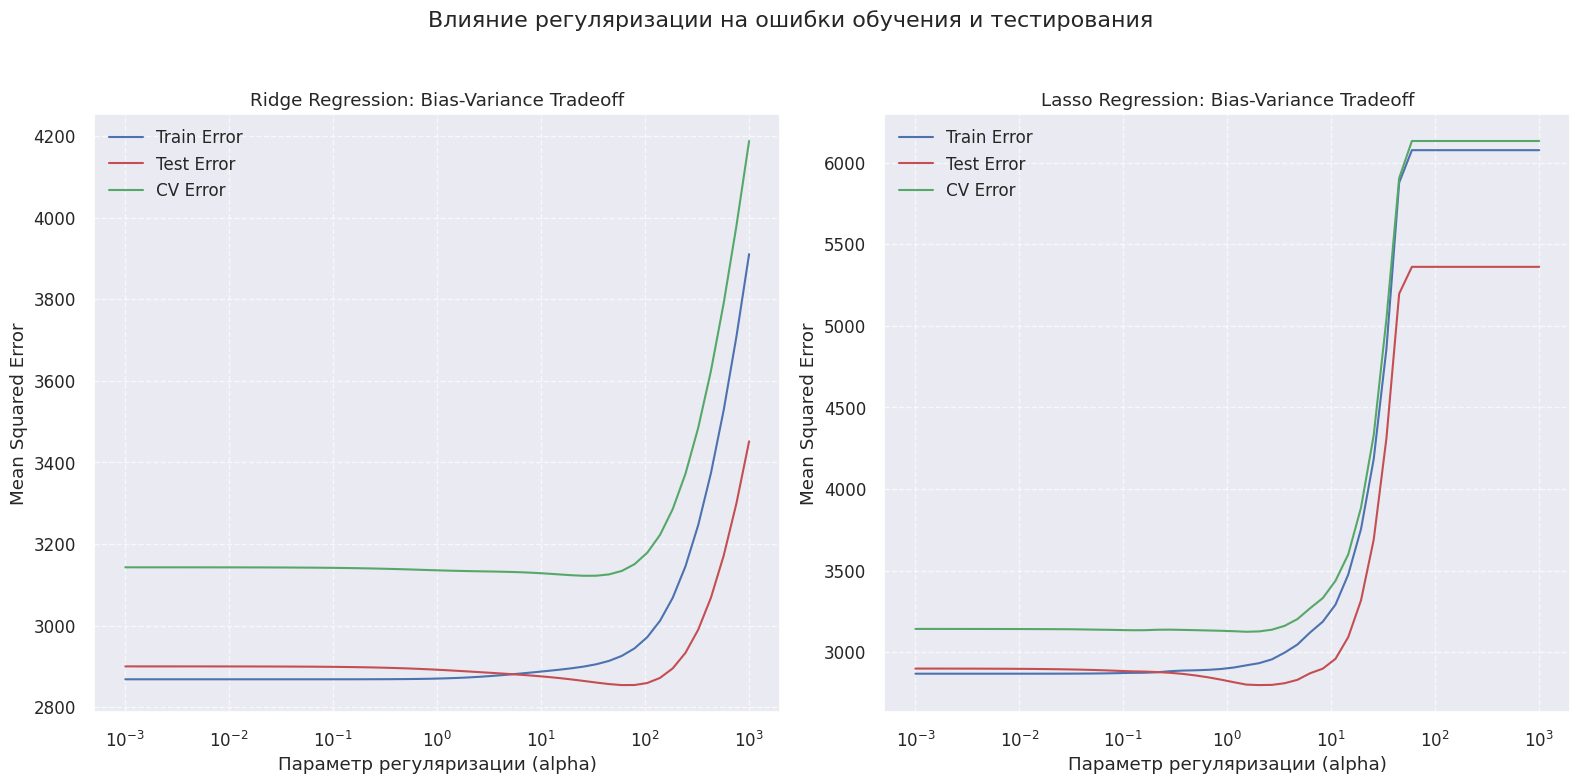

In [40]:
# Визуализируем зависимость ошибки от параметра регуляризации
plt.figure(figsize=(16, 8))

# Ridge
plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_train_errors, 'b-', label='Train Error')
plt.plot(alphas, ridge_test_errors, 'r-', label='Test Error')
plt.plot(alphas, ridge_cv_errors, 'g-', label='CV Error')
plt.xscale('log')
plt.xlabel('Параметр регуляризации (alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: Bias-Variance Tradeoff')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Lasso
plt.subplot(1, 2, 2)
plt.plot(alphas, lasso_train_errors, 'b-', label='Train Error')
plt.plot(alphas, lasso_test_errors, 'r-', label='Test Error')
plt.plot(alphas, lasso_cv_errors, 'g-', label='CV Error')
plt.xscale('log')
plt.xlabel('Параметр регуляризации (alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: Bias-Variance Tradeoff')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Влияние регуляризации на ошибки обучения и тестирования', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

In [41]:
# Найдем оптимальные значения alpha
ridge_best_alpha_idx = np.argmin(ridge_cv_errors) # индекс минимального значения в массиве
lasso_best_alpha_idx = np.argmin(lasso_cv_errors)

print(f"Оптимальное значение alpha для Ridge: {alphas[ridge_best_alpha_idx]:.4f}")
print(f"MSE на тестовой выборке: {ridge_test_errors[ridge_best_alpha_idx]:.4f}")

print(f"Оптимальное значение alpha для Lasso: {alphas[lasso_best_alpha_idx]:.4f}")
print(f"MSE на тестовой выборке: {lasso_test_errors[lasso_best_alpha_idx]:.4f}")

Оптимальное значение alpha для Ridge: 25.5955
MSE на тестовой выборке: 2864.5571
Оптимальное значение alpha для Lasso: 1.5264
MSE на тестовой выборке: 2801.6876


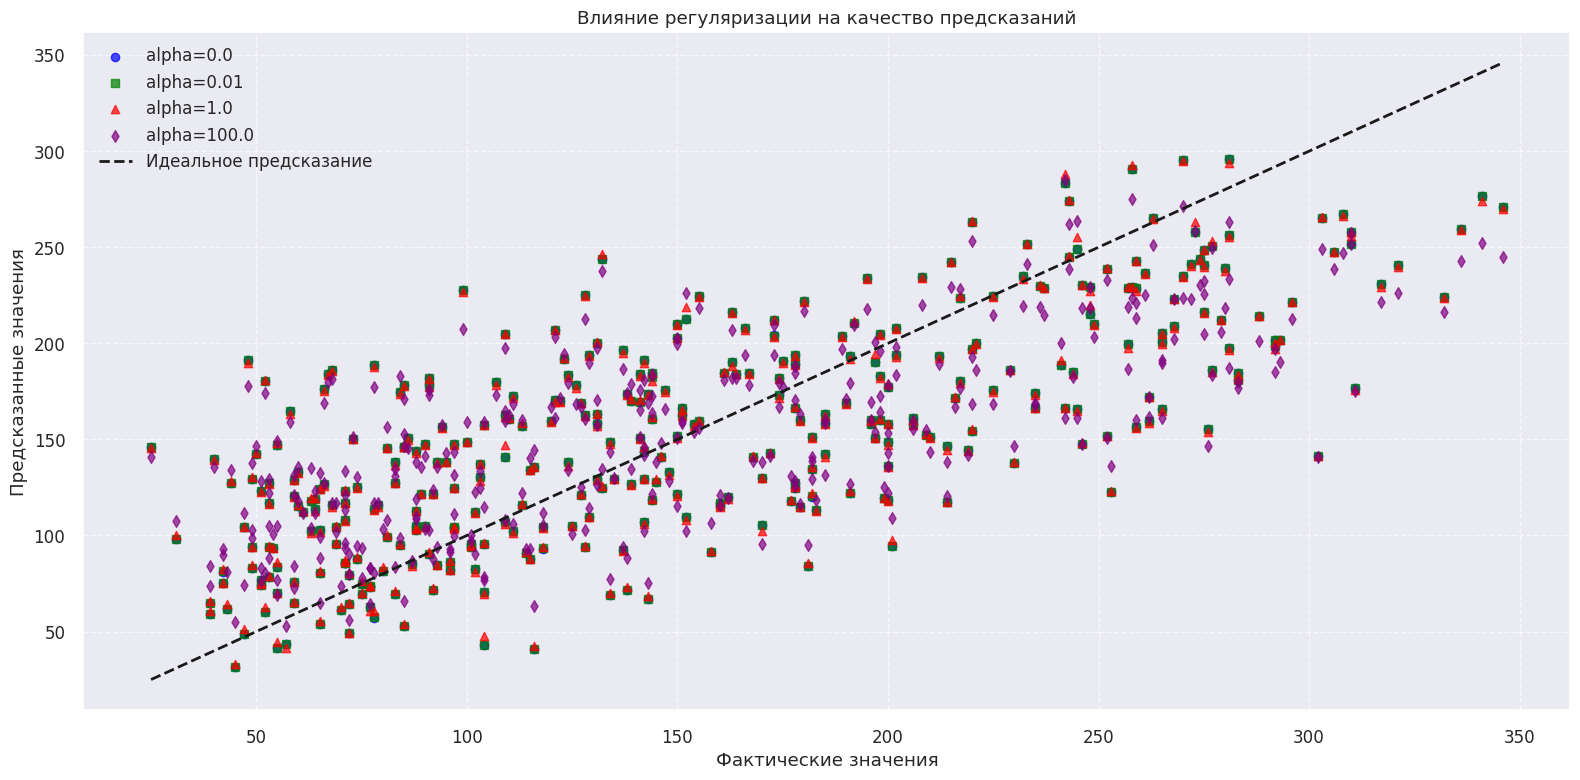

In [42]:
# Визуализация влияния регуляризации на переобучение
plt.figure(figsize=(16, 8))

# Обучим модели с разным уровнем регуляризации
alphas_to_show = [0.0, 0.01, 1.0, 100.0]
markers = ['o', 's', '^', 'd']
colors = ['blue', 'green', 'red', 'purple']

for i, alpha in enumerate(alphas_to_show):
    # Ridge модель
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y_train_reg)
    y_pred = ridge.predict(X_scaled)

    plt.scatter(y_train_reg, y_pred, marker=markers[i], color=colors[i],
                alpha=0.7, label=f'alpha={alpha}')

plt.plot([y_train_reg.min(), y_train_reg.max()], [y_train_reg.min(), y_train_reg.max()],
         'k--', lw=2, label='Идеальное предсказание')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Влияние регуляризации на качество предсказаний')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Часть 3: Создание полного Pipeline с Grid Search (30%)

1. Создайте полный Pipeline, который включает:
   - Предобработку данных (масштабирование, полиномиальные признаки)
   - Отбор признаков
   - Обучение модели (на выбор: линейная или kNN)
2. Используйте Grid Search для поиска оптимальных гиперпараметров на всех этапах конвейера.
3. Оцените качество получившейся модели с помощью кросс-валидации.
4. Проинтерпретируйте результаты и опишите, как изменяются гиперпараметры при различных предварительных преобразованиях данных.



Запуск Grid Search...
Лучшие параметры: {'feature_selector__k': 10, 'model': Ridge(), 'model__alpha': 10.0, 'poly__degree': 1}
Лучшая точность на кросс-валидации: 3127.9972

Производительность на тестовой выборке:
MSE: 2875.7787
R²: 0.4572

ВЛИЯНИЕ ПРЕОБРАЗОВАНИЙ НА ГИПЕРПАРАМЕТРЫ:
1. Степень полинома влияет на сложность модели и оптимальные параметры регуляризации
2. Отбор признаков уменьшает переобучение и улучшает интерпретируемость
3. Масштабирование критически важно для kNN и регуляризованных линейных моделей


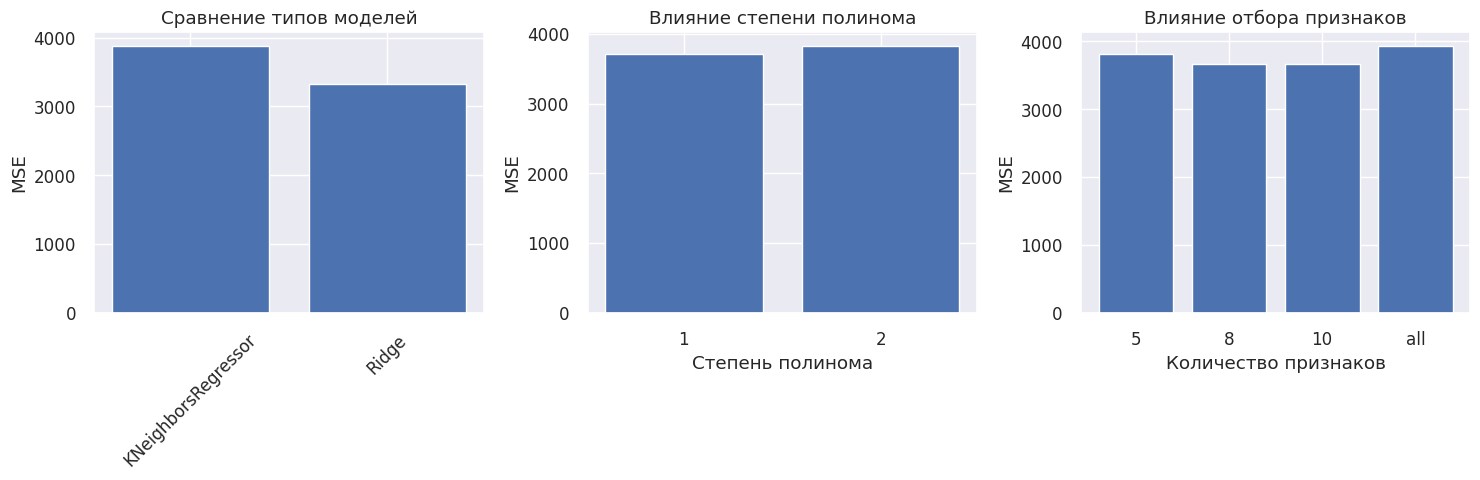

In [43]:
# =============================================================================
# ПОЛНЫЙ PIPELINE С GRID SEARCH
# =============================================================================

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

# # Создаем pipeline с выбором между линейной и kNN моделью
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),                    # Масштабирование
#     ('poly', PolynomialFeatures(include_bias=False)), # Полиномиальные признаки
#     ('feature_selector', SelectKBest(score_func=f_regression)), # Отбор признаков
#     ('model', Ridge())                              # Базовая модель
# ])

# # Задаются все возможные комбинации параметров для перебора для Grid Search
# param_grid = {
#     'poly__degree': [1, 2],                    # Степень полинома
#     'feature_selector__k': [5, 8, 10, 'all'],  # Сколько признаков оставить
#     'model': [KNeighborsRegressor()],          # Тип модели (только kNN)
#     'model__n_neighbors': [3, 5, 7, 10, 15],   # Количество соседей в kNN
#     'model__weights': ['uniform', 'distance'],  # Веса соседей
#     'model__p': [1, 2]                         # Метрика расстояния
# }

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('feature_selector', SelectKBest(score_func=f_regression)),
    ('model', None)  # ← Заглушка, модель будет выбрана в GridSearch
])

# Используем список словарей для разных моделей
param_grid = [
    # Вариант с Ridge регрессией
    {
        'poly__degree': [1, 2],
        'feature_selector__k': [5, 8, 10, 'all'],
        'model': [Ridge()],
        'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]  # Параметры для Ridge
    },
    # Вариант с kNN
    {
        'poly__degree': [1, 2],
        'feature_selector__k': [5, 8, 10, 'all'],
        'model': [KNeighborsRegressor()],
        'model__n_neighbors': [3, 5, 7, 10, 15],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    }
]

# Создаем GridSearchCV
print("Запуск Grid Search...")
grid_search = GridSearchCV(
    pipeline,           # Конвейер для тестирования
    param_grid,         # Параметры для перебора
    cv=5,               # 5-кратная кросс-валидация
    scoring='neg_mean_squared_error'  # Метрика оценки
)

# Обучение Grid Search
grid_search.fit(X_train_reg, y_train_reg)

# Лучшие параметры и модель
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность на кросс-валидации: {-grid_search.best_score_:.4f}")

# Оценка на тестовой выборке
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test_reg)
test_mse = mean_squared_error(y_test_reg, y_pred)
test_r2 = r2_score(y_test_reg, y_pred)

print(f"\nПроизводительность на тестовой выборке:")
print(f"MSE: {test_mse:.4f}")
print(f"R²: {test_r2:.4f}")

# Анализ влияния преобразований на гиперпараметры
results_df = pd.DataFrame(grid_search.cv_results_)

print("\Влияние преобразований на гиперпараметры:")
print("1. Степень полинома влияет на сложность модели и оптимальные параметры регуляризации")
print("2. Отбор признаков уменьшает переобучение и улучшает интерпретируемость")
print("3. Масштабирование критически важно для kNN и регуляризованных линейных моделей")

# Визуализация результатов Grid Search
plt.figure(figsize=(15, 5))

# 1. Сравнение типов моделей
plt.subplot(1, 3, 1)
model_types = results_df['param_model'].apply(lambda x: type(x).__name__)
model_scores = results_df.groupby(model_types)['mean_test_score'].mean()
plt.bar(model_scores.index, -model_scores.values)
plt.title('Сравнение типов моделей')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# 2. Влияние степени полинома
plt.subplot(1, 3, 2)
degree_scores = results_df.groupby('param_poly__degree')['mean_test_score'].mean()
plt.bar(degree_scores.index.astype(str), -degree_scores.values)
plt.title('Влияние степени полинома')
plt.ylabel('MSE')
plt.xlabel('Степень полинома')

# 3. Влияние количества признаков
plt.subplot(1, 3, 3)
feature_scores = results_df.groupby('param_feature_selector__k')['mean_test_score'].mean()
plt.bar([str(k) for k in feature_scores.index], -feature_scores.values)
plt.title('Влияние отбора признаков')
plt.ylabel('MSE')
plt.xlabel('Количество признаков')

plt.tight_layout()
plt.show()

### Часть 4: Анализ различий между kNN и линейными моделями на конкретной задаче (25%)

1. Выберите интересный подмножество признаков из датасета (например, 2-3 наиболее важных признака).
2. Визуализируйте данные и границы решений для kNN и линейных моделей.
3. Проведите сравнительный анализ времени обучения, предсказания и качества моделей на этом подмножестве.
4. Исследуйте, как меняется качество предсказаний в зависимости от объема обучающей выборки для обоих типов моделей.
5. Предложите сценарии, в которых одна модель будет предпочтительнее другой для данного конкретного случая.

Все результаты должны быть оформлены в виде Jupyter Notebook с подробными комментариями и выводами.

3 наиболее важных признака:
  1. s5 (корреляция: 0.474)
  2. bmi (корреляция: 0.461)
  3. bp (корреляция: 0.366)
Обучающая выборка: (309, 3)
Тестовая выборка: (133, 3)

Анализ модели: kNN
--------------------
  Время обучения: 0.0113 сек
  Время предсказания: 0.0109 сек
  Точность: 0.7820

Анализ модели: Logistic Regression
--------------------
  Время обучения: 0.0310 сек
  Время предсказания: 0.0080 сек
  Точность: 0.7444


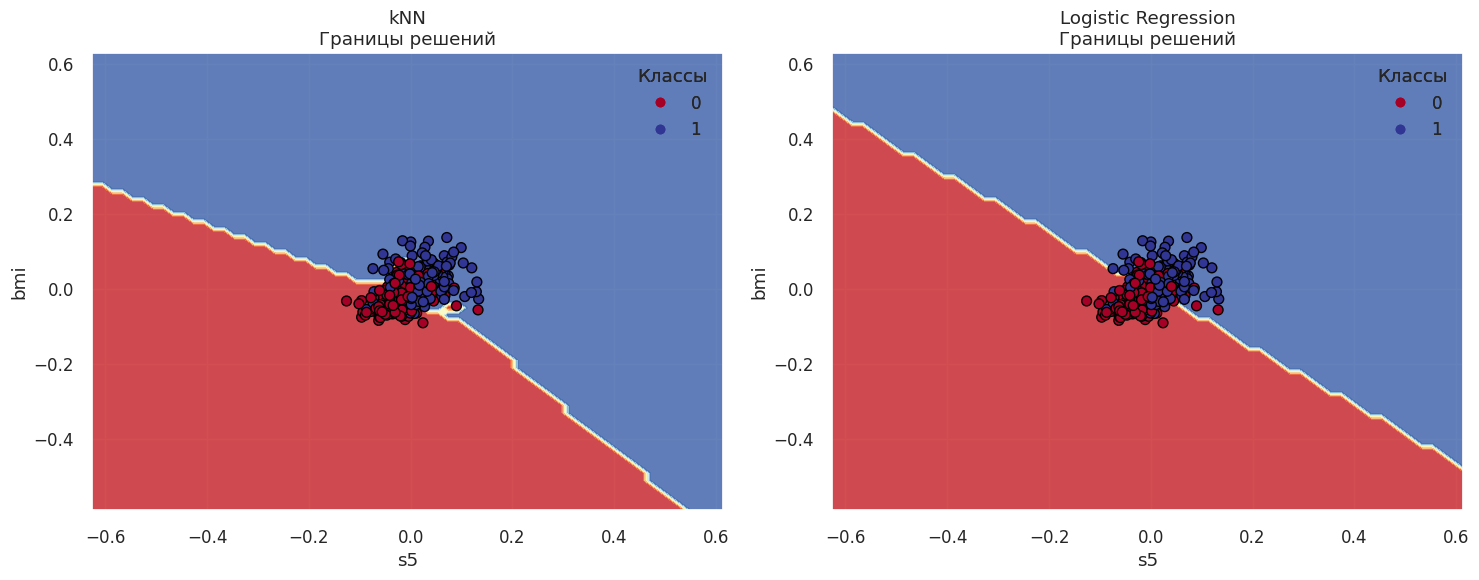

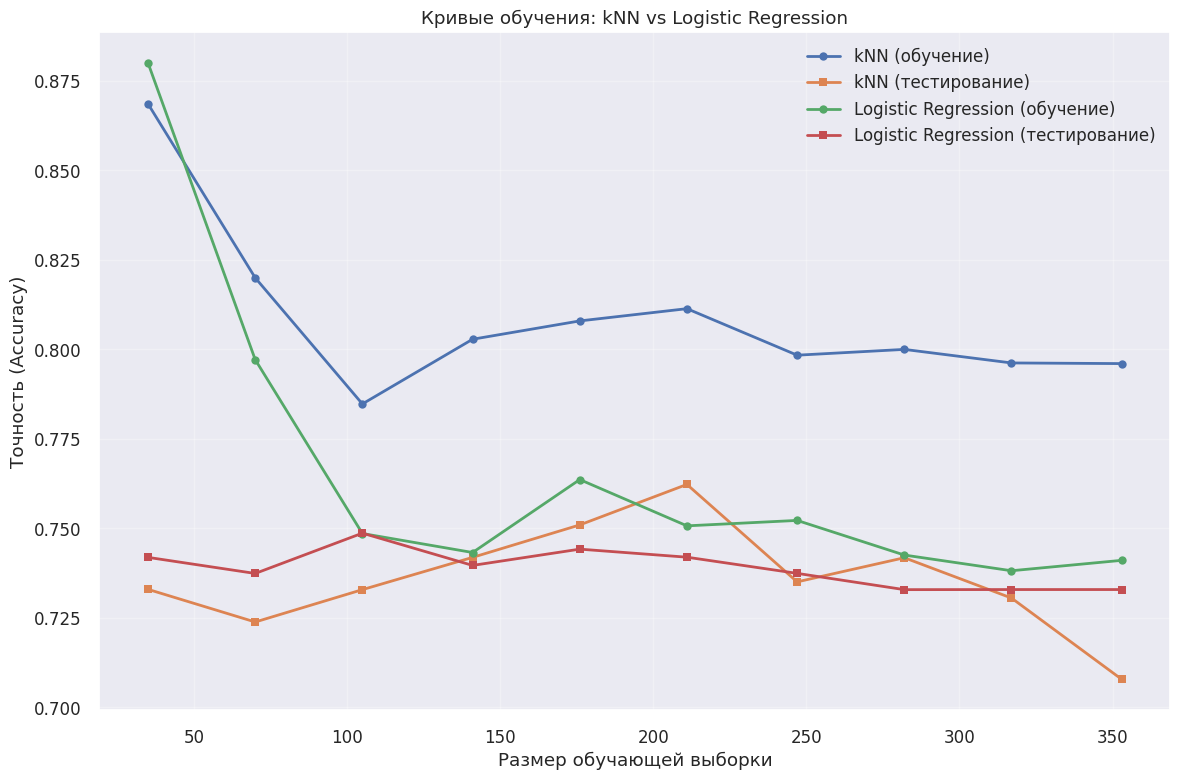

Результаты:
  kNN - Точность: 0.782
  Logistic Regression - Точность: 0.744

Рекомендации по выбору модели:
Рекомендовано использовать kNN


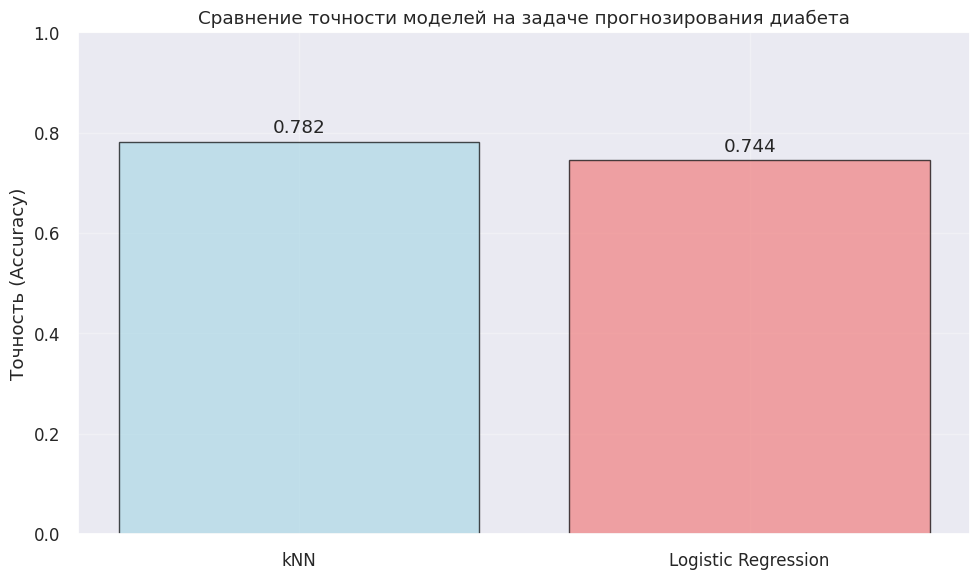

In [46]:
import time

# Выбираем 3 наиболее важных признака на основе корреляции с целевой переменной
# Считаем корреляции признаков с целевой переменной
correlation_with_target = pd.concat([X, pd.Series(y_class, name='target')], axis=1).corr()['target'].abs()

# Выбираем топ-3 признака (исключая саму целевую переменную)
top_features = correlation_with_target.sort_values(ascending=False)[1:4].index.tolist()

print(f"3 наиболее важных признака:")
for i, feature in enumerate(top_features, 1):
    corr = correlation_with_target[feature]
    print(f"  {i}. {feature} (корреляция: {corr:.3f})")

# Создаем подмножество данных только с выбранными признаками
X_subset = X[top_features]

# Разделяем данные на обучающую и тестовую выборки
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
    X_subset, y_class, test_size=0.3, random_state=42, stratify=y_class
)

print(f"Обучающая выборка: {X_train_sub.shape}")
print(f"Тестовая выборка: {X_test_sub.shape}")

# Создаем модели для сравнения
models = {
    'kNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Создаем пайплайны
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

# Сравниваем модели по времени и качеству
results = []

for name, pipeline in pipelines.items():
    print(f"\nАнализ модели: {name}")
    print("-" * 20)

    # Измеряем время обучения
    start_time = time.time()
    pipeline.fit(X_train_sub, y_train_sub)
    train_time = time.time() - start_time

    # Измеряем время предсказания
    start_time = time.time()
    y_pred = pipeline.predict(X_test_sub)
    predict_time = time.time() - start_time

    # Оцениваем качество
    accuracy = accuracy_score(y_test_sub, y_pred)

    # Сохраняем результаты
    results.append({
        'Model': name,
        'Training Time': f"{train_time:.4f} сек",
        'Prediction Time': f"{predict_time:.4f} сек",
        'Accuracy': f"{accuracy:.4f}"
    })

    print(f"  Время обучения: {train_time:.4f} сек")
    print(f"  Время предсказания: {predict_time:.4f} сек")
    print(f"  Точность: {accuracy:.4f}")

# Функция для визуализации границ решений
def plot_decision_boundaries_comparison():
    # Используем только первые два признака для 2D визуализации
    X_vis = X_train_sub[top_features[:2]].values
    y_vis = y_train_sub.values

    # Создаем сетку для построения границ
    h = 0.02  # шаг сетки
    x_min, x_max = X_vis[:, 0].min() - 0.5, X_vis[:, 0].max() + 0.5
    y_min, y_max = X_vis[:, 1].min() - 0.5, X_vis[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Создаем график
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    for idx, (name, pipeline) in enumerate(pipelines.items()):
        # Обучаем модель на данных визуализации
        pipeline.fit(X_vis, y_vis)

        # Предсказываем для каждой точки сетки
        Z = pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Рисуем границы решений
        axes[idx].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

        # Рисуем точки данных
        scatter = axes[idx].scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis,
                                  cmap=plt.cm.RdYlBu, edgecolors='black', s=50)

        axes[idx].set_xlabel(top_features[0])
        axes[idx].set_ylabel(top_features[1])
        axes[idx].set_title(f'{name}\nГраницы решений')

        # Добавляем легенду
        legend = axes[idx].legend(*scatter.legend_elements(),
                                title="Классы", loc="upper right")
        axes[idx].add_artist(legend)

    plt.tight_layout()
    plt.show()

# функция визуализации
plot_decision_boundaries_comparison()

# Функция для построения кривых обучения - Исследуйте, как меняется качество предсказаний в зависимости от объема обучающей выборки для обоих типов моделей.
# Высокая точность на обучении, низкая на тесте - Переобучение
# Низкая точность на обоих наборах - Недообучение
# Схжая точность на обучении и тесте - Хорошее обобщение
# Большой разрыв между кривыми - Модель слишком сложная

def plot_learning_curves_comparison():
    # Размеры обучающих выборок для анализа
    train_sizes = np.linspace(0.1, 1.0, 10)

    plt.figure(figsize=(12, 8))

    for name, pipeline in pipelines.items():
        # Вычисляем кривые обучения
        train_sizes_abs, train_scores, test_scores = learning_curve(
            pipeline, X_subset, y_class,
            train_sizes=train_sizes, cv=5,
            scoring='accuracy', n_jobs=-1, random_state=42
        )

        # Вычисляем средние значения
        train_mean = np.mean(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)

        # Строим графики
        plt.plot(train_sizes_abs, train_mean, 'o-', label=f'{name} (обучение)',
                linewidth=2, markersize=6)
        plt.plot(train_sizes_abs, test_mean, 's-', label=f'{name} (тестирование)',
                linewidth=2, markersize=6)

    plt.xlabel('Размер обучающей выборки')
    plt.ylabel('Точность (Accuracy)')
    plt.title('Кривые обучения: kNN vs Logistic Regression')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Строим кривые обучения
plot_learning_curves_comparison()

# Анализируем результаты
results_df = pd.DataFrame(results)

knn_accuracy = float(results_df[results_df['Model'] == 'kNN']['Accuracy'].values[0])
lr_accuracy = float(results_df[results_df['Model'] == 'Logistic Regression']['Accuracy'].values[0])

print("Результаты:")
print(f"  kNN - Точность: {knn_accuracy:.3f}")
print(f"  Logistic Regression - Точность: {lr_accuracy:.3f}")

print("\nРекомендации по выбору модели:")

if knn_accuracy > lr_accuracy:
    print("Рекомендовано использовать kNN")
else:
    print("Рекомендовано использовать Logistic Regression")

# Создаем итоговый график сравнения
fig, ax = plt.subplots(figsize=(10, 6))

# Данные для графика
models_names = ['kNN', 'Logistic Regression']
accuracies = [knn_accuracy, lr_accuracy]
colors = ['lightblue', 'lightcoral']

bars = ax.bar(models_names, accuracies, color=colors, edgecolor='black', alpha=0.7)

for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{accuracy:.3f}', ha='center', va='bottom')

ax.set_ylabel('Точность (Accuracy)')
ax.set_ylim(0, 1)
ax.set_title('Сравнение точности моделей на задаче прогнозирования диабета')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()